In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Task 1

### Loading Data

In [2]:
train = pd.read_csv('train.csv')
x, y = train['Text'], train['Category']
cv = CountVectorizer()
x = cv.fit_transform(x)
feature_names = cv.get_feature_names_out()
x = pd.DataFrame(x.toarray(), columns=feature_names)

print(f'Number of Articles: {x.shape[0]}')
print(f'Number of Features: {x.shape[1]}')   

train = train.join(x)
train.head()

Number of Articles: 428
Number of Features: 13518


,ArticleId,Text,Category,00,000,000th,001st,0051,007,0100,...,zola,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro
0,1976,lifestyle governs mobile choice faster better ...,tech,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1797,french honour director parker british film dir...,entertainment,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1866,fockers fuel festive film chart comedy meet fo...,entertainment,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1153,housewives lift channel 4 ratings debut us tel...,entertainment,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,342,u2 desire number one u2 three prestigious gram...,entertainment,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Top-50 Term Frequency Distribution

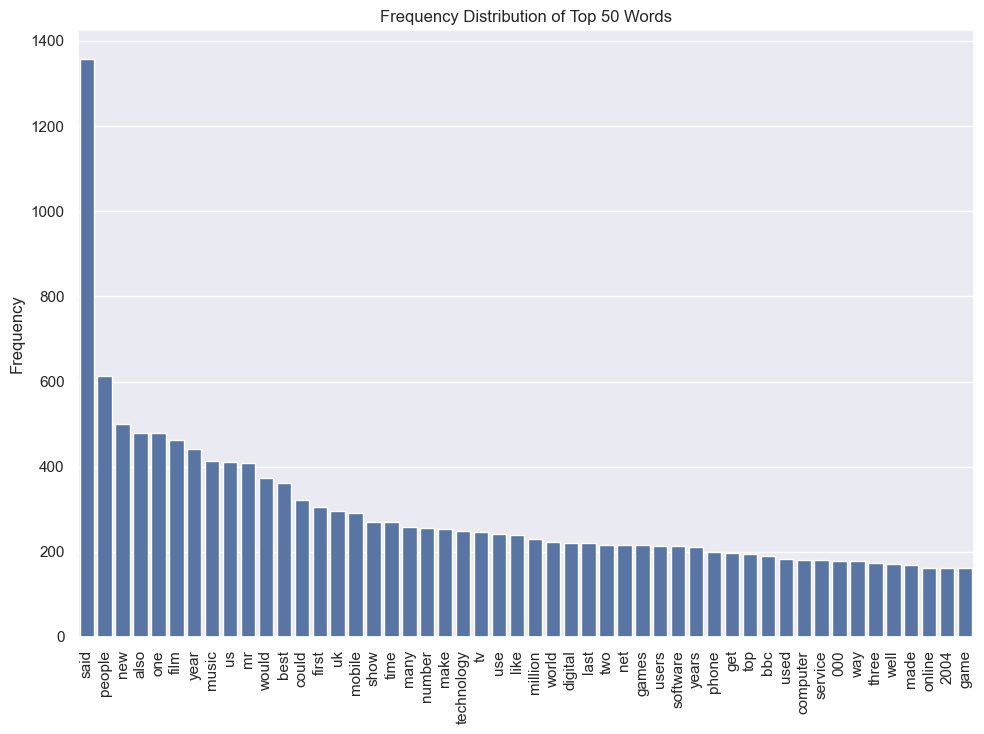

In [23]:
word_totals = x.sum(axis=0)
top_50 = word_totals.sort_values(ascending=False).head(50)

sns.set_theme(rc={'figure.figsize':(10,7.5)})
sns.barplot(top_50)
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Top 50 Words')
plt.ylabel('Frequency')
plt.tight_layout()

### Term Frequency Distribution by Class

In [7]:
totals_by_class = x.join(y).groupby('Category').sum()
totals_by_class


,00,000,000th,001st,0051,007,0100,0130,028,05,...,zola,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro
Category,,,,,,,,,,,,,,,,,,,,,
entertainment,0,78,2,1,0,1,2,2,0,3,...,1,0,0,1,0,0,0,0,1,2
tech,1,101,0,0,1,2,0,0,1,0,...,0,2,4,2,1,1,3,2,0,0


### Class Distribution

Text(0.5, 1.0, 'Class Distribution')

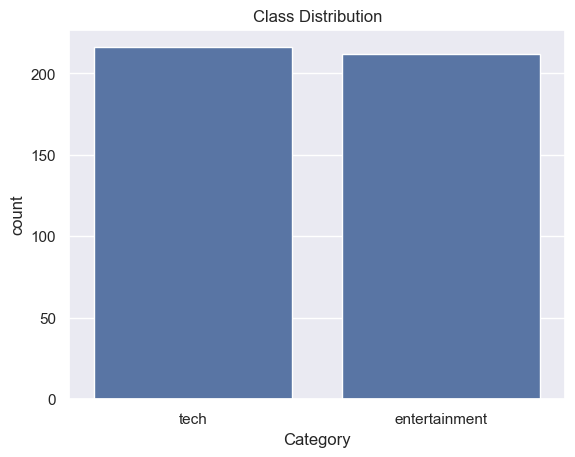

In [19]:
sns.set_theme(rc={'figure.figsize':(6.4,4.8)})
sns.barplot(train['Category'].value_counts())
plt.title('Class Distribution')

The above code snippets show that the distribution of classes within the training data is basically even.

# Task 2

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=0)

### Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_val)

### K-Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)

### Support Vector Machine

In [ ]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_val)

### Neural Network

In [ ]:
nn = MLPClassifier()
nn.fit(x_train, y_train)
y_pred = nn.predict(x_val)

# Task 3